# Exploratory analysis

Initial code for exploratory for FSDS Data+PolicyBriefing assignment

By: Andres Restrepo

## Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import fiona
import requests
import seaborn as sns

## Reading the data

### Reading the Airbnb data

#### Reading localy

##### 2020

In [3]:
air_2020 = pd.read_csv("data/raw/listings-2020.csv.gz", compression='gzip', low_memory=False)
print(f"Data frame is {air_2020.shape[0]:,} x {air_2020.shape[1]}")

Data frame is 74,188 x 74


###### Inspecting

In [4]:
air_2020.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551.0,https://www.airbnb.com/rooms/11551,20200824024753,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039.0,https://www.airbnb.com/users/show/43039,...,10.0,9.0,9.0,NaN,t,2.0,2.0,0.0,0.0,1.51
1,13913.0,https://www.airbnb.com/rooms/13913,20200824024753,2020-08-27,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/ffb507b7-983c...,54730.0,https://www.airbnb.com/users/show/54730,...,10.0,9.0,9.0,NaN,f,3.0,1.0,2.0,0.0,0.17
2,15400.0,https://www.airbnb.com/rooms/15400,20200824024753,2020-08-26,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302.0,https://www.airbnb.com/users/show/60302,...,10.0,10.0,9.0,NaN,t,1.0,1.0,0.0,0.0,0.68
3,17402.0,https://www.airbnb.com/rooms/17402,20200824024753,2020-08-27,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564.0,https://www.airbnb.com/users/show/67564,...,9.0,10.0,9.0,NaN,t,14.0,14.0,0.0,0.0,0.37
4,17506.0,https://www.airbnb.com/rooms/17506,20200824024753,2020-08-26,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915.0,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2.0,0.0,2.0,0.0,NaN


##### Describing

In [5]:
air_2020.describe()

,id,host_id,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,beds,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.418600e+04,7.418800e+04,74175.000000,2.000000,74186.000000,74186.000000,74186.000000,2.000000,73199.000000,74186.000000,...,52194.000000,52234.000000,52197.000000,52196.000000,0.0,74184.000000,74184.000000,74184.000000,74184.000000,53901.000000
mean,2.524026e+07,9.403591e+07,22.460775,570.000000,51.508588,-0.128352,3.129755,570.000000,1.729218,4.957067,...,9.640744,9.662921,9.551871,9.281478,NaN,17.023401,14.269047,2.169484,0.045239,0.720166
std,1.292372e+07,9.804038e+07,115.784574,784.888527,0.261351,0.095638,1.989834,784.888527,1.289836,21.145133,...,0.923870,0.913548,0.856592,1.072651,NaN,76.759048,74.269755,13.894196,0.625069,0.949437
min,1.155100e+04,1.000000e+00,0.000000,15.000000,2.000000,-0.496250,1.000000,15.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.504579e+07,1.578421e+07,1.000000,292.500000,51.484940,-0.189120,2.000000,292.500000,1.000000,1.000000,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.140000
50%,2.576235e+07,4.911094e+07,1.000000,570.000000,51.514070,-0.126570,2.000000,570.000000,1.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.380000
75%,3.697921e+07,1.529342e+08,4.000000,847.500000,51.538410,-0.069660,4.000000,847.500000,2.000000,3.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,4.000000,2.000000,1.000000,0.000000,0.940000
max,4.509040e+07,3.639824e+08,1309.000000,1125.000000,51.681690,2.000000,16.000000,1125.000000,28.000000,1125.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,718.000000,717.000000,230.000000,18.000000,20.000000


In [6]:
#Reviewing the type of each column
air_2020.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74188 entries, 0 to 74187
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            74186 non-null  float64
 1   listing_url                                   74187 non-null  object 
 2   scrape_id                                     74187 non-null  object 
 3   last_scraped                                  74187 non-null  object 
 4   name                                          74167 non-null  object 
 5   description                                   71329 non-null  object 
 6   neighborhood_overview                         47208 non-null  object 
 7   picture_url                                   74188 non-null  object 
 8   host_id                                       74188 non-null  float64
 9   host_url                                      74188 non-null 

##### Profiling

In [7]:
profile = ProfileReport(air_2020[["latitude", "longitude",'property_type','room_type','price']], title="Pandas Profiling Report") #To profile all the variables
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
air_2020[air_2020.latitude==2]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3559,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/1c171...,https://a0.muscache.com/im/pictures/user/1c171...,Shoreditch,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29990,NaN,within an hour,100%,74%,f,https://a0.muscache.com/im/pictures/user/19315...,https://a0.muscache.com/im/pictures/user/19315...,Richmond,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
air_2020[air_2020.longitude==2]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3559,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/1c171...,https://a0.muscache.com/im/pictures/user/1c171...,Shoreditch,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29990,NaN,within an hour,100%,74%,f,https://a0.muscache.com/im/pictures/user/19315...,https://a0.muscache.com/im/pictures/user/19315...,Richmond,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
air_2020[air_2020.longitude.isna()]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3558,3138549.0,https://www.airbnb.com/rooms/3138549,20200824024753,2020-08-26,Heart of City of London/Shoreditch,Our lovely flat is in a newly designed buildin...,"Old Street is in the heart of Shoreditch, with...",https://a0.muscache.com/pictures/ed787e5d-730c...,4968944.0,https://www.airbnb.com/users/show/4968944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29989,21549106.0,https://www.airbnb.com/rooms/21549106,20200824024753,2020-08-27,"Richmond Luxury, High ceilings & Free Parking",Welcome to my Richmond (not East Twickenham) b...,Richmond is famous for its Royal parks & impre...,https://a0.muscache.com/pictures/355d8a17-8d9e...,123942428.0,https://www.airbnb.com/users/show/123942428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
air_2020[air_2020.latitude.isna()]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3558,3138549.0,https://www.airbnb.com/rooms/3138549,20200824024753,2020-08-26,Heart of City of London/Shoreditch,Our lovely flat is in a newly designed buildin...,"Old Street is in the heart of Shoreditch, with...",https://a0.muscache.com/pictures/ed787e5d-730c...,4968944.0,https://www.airbnb.com/users/show/4968944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29989,21549106.0,https://www.airbnb.com/rooms/21549106,20200824024753,2020-08-27,"Richmond Luxury, High ceilings & Free Parking",Welcome to my Richmond (not East Twickenham) b...,Richmond is famous for its Royal parks & impre...,https://a0.muscache.com/pictures/355d8a17-8d9e...,123942428.0,https://www.airbnb.com/users/show/123942428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Price

In [12]:
#Review the price column
money = ['price']
air_2020.sample(5, random_state=42)[money]

,price
36626,$170.00
54419,$75.00
27090,$18.00
71147,$410.00
43164,$250.00


Converting to float

In [13]:
for m in money:
    print(f"Converting {m}")
    air_2020[m] = air_2020[m].str.replace('$','', regex=False).str.replace(',','', regex=False).astype('float')

Converting price


In [14]:
air_2020.sample(5)[money]

,price
33271,99.29
30815,75.00
5286,99.00
67370,20.00
46660,55.00


In [15]:
air_2020[air_2020.price==0].shape

(7, 74)

##### Droping rows

In [16]:
air_2020.drop(air_2020[(air_2020.latitude==2) | (air_2020.longitude==2)|(air_2020.latitude.isna())|(air_2020.longitude.isna())|(air_2020.price==0)].index.array, axis=0, inplace=True)
print(f"Data frame is now {air_2020.shape[0]:,} x {air_2020.shape[1]}")

Data frame is now 74,178 x 74


##### Property type

In [17]:
cats = ['property_type','room_type']
air_2020.sample(5, random_state=42)[cats]

,property_type,room_type
196,Private room in apartment,Private room
22534,Entire house,Entire home/apt
10831,Entire apartment,Entire home/apt
54904,Private room in apartment,Private room
18112,Entire house,Entire home/apt


In [18]:
#Counting by room type
air_2020[cats[0]].value_counts()

Entire apartment             31459
Private room in apartment    17145
Private room in house        10757
Entire house                  5317
Private room in townhouse     1539
                             ...  
Private room in camper/rv        1
Earth house                      1
Shared room in bus               1
Private room in floor            1
Dome house                       1
Name: property_type, Length: 91, dtype: int64

In [19]:
air_2020[cats[1]].value_counts()

Entire home/apt    40853
Private room       32161
Shared room          592
Hotel room           572
Name: room_type, dtype: int64

Converting to categorical variables

In [20]:
for c in cats:
    print(f"Converting {c}")
    air_2020[c] = air_2020[c].astype('category')

Converting property_type
Converting room_type


In [21]:
print(air_2020[cats[0]].cat.categories.values)

['Barn' 'Boat' 'Camper/RV' 'Campsite' 'Casa particular' 'Dome house'
 'Earth house' 'Entire apartment' 'Entire bungalow' 'Entire cabin'
 'Entire chalet' 'Entire condominium' 'Entire cottage' 'Entire floor'
 'Entire guest suite' 'Entire guesthouse' 'Entire home/apt' 'Entire house'
 'Entire loft' 'Entire place' 'Entire serviced apartment'
 'Entire townhouse' 'Entire villa' 'Houseboat' 'Hut' 'Island' 'Lighthouse'
 'Private room' 'Private room in apartment'
 'Private room in bed and breakfast' 'Private room in boat'
 'Private room in bungalow' 'Private room in bus' 'Private room in cabin'
 'Private room in camper/rv' 'Private room in casa particular'
 'Private room in casa particular (cuba)' 'Private room in castle'
 'Private room in chalet' 'Private room in condominium'
 'Private room in cottage' 'Private room in dome house'
 'Private room in earth house' 'Private room in farm stay'
 'Private room in floor' 'Private room in guest suite'
 'Private room in guesthouse' 'Private room in hoste

In [22]:
print(air_2020[cats[1]].cat.categories.values)

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


Grouping by categorical variables

In [23]:
air_2020.groupby('room_type')['property_type'].value_counts()

room_type                                 
Entire home/apt  Entire apartment             31459
                 Entire house                  5317
                 Entire condominium            1164
                 Entire townhouse               966
                 Entire serviced apartment      838
                                              ...  
Shared room      Private room in apartment        0
                 Private room                     0
                 Lighthouse                       0
                 Island                           0
                 Yurt                             0
Name: property_type, Length: 364, dtype: int64

In [24]:
air_2020[air_2020.room_type=='Entire home/apt'].shape[0]

40853

In [25]:
print(f"There are {(air_2020[air_2020.room_type=='Entire home/apt'].shape[0]):,} Airbnb listings for entire properties in London in the year 2020.")

There are 40,853 Airbnb listings for entire properties in London in the year 2020.


##### Reading geo data frame

In [26]:
geo_air_2020 = gpd.GeoDataFrame(air_2020, geometry=gpd.points_from_xy(air_2020.longitude, air_2020.latitude), crs="EPSG:4326")

In [27]:
#Inspecting the variables on the geo df
geo_air_2020.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 74178 entries, 0 to 74187
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            74178 non-null  float64 
 1   listing_url                                   74178 non-null  object  
 2   scrape_id                                     74178 non-null  object  
 3   last_scraped                                  74178 non-null  object  
 4   name                                          74157 non-null  object  
 5   description                                   71323 non-null  object  
 6   neighborhood_overview                         47203 non-null  object  
 7   picture_url                                   74178 non-null  object  
 8   host_id                                       74178 non-null  float64 
 9   host_url                                  

In [28]:
print(geo_air_2020.crs)

EPSG:4326


In [29]:
#Changing the CRS
geo_air_2020.to_crs(crs="EPSG:27700",inplace=True)
print(geo_air_2020.crs)

EPSG:27700


In [30]:
print(f"The bottom-left corner is {geo_air_2020.longitude.min()}, {geo_air_2020.longitude.max()}")
print(f"The top-right corner is {geo_air_2020.latitude.min()}, {geo_air_2020.latitude.max()}")

The bottom-left corner is -0.49625, 0.2845
The top-right corner is 51.29479, 51.68169


##### Plotting

<AxesSubplot:>

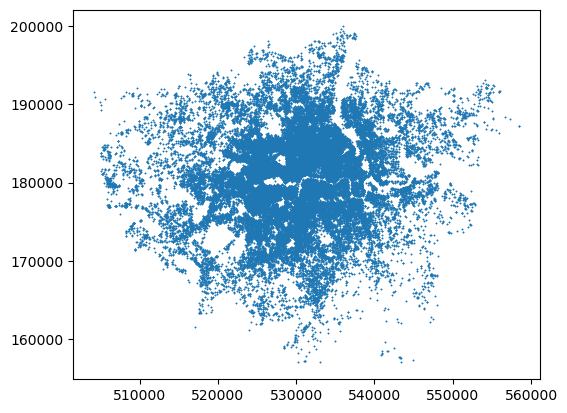

In [31]:
geo_air_2020.plot(marker='*',markersize=0.1)

##### Kernel

/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

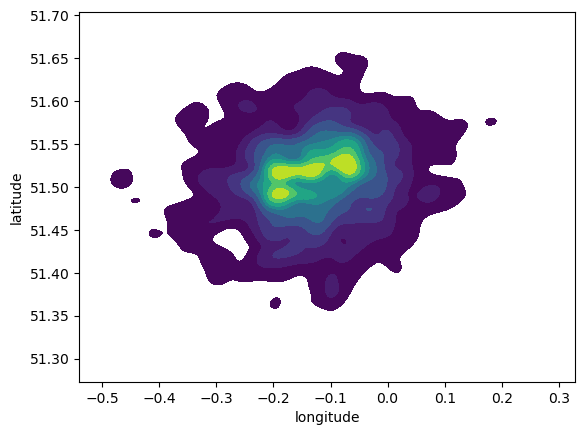

In [32]:
sns.kdeplot(geo_air_2020['longitude'], geo_air_2020['latitude'], shade=True, cmap='viridis',common_grid=True)

##### 2022

In [33]:
air_2022 = pd.read_csv("data/raw/listings-2022.csv.gz", compression='gzip', low_memory=False)
print(f"Data frame is {air_2022.shape[0]:,} x {air_2022.shape[1]}")

Data frame is 69,351 x 75


###### Inspecting

In [34]:
air_2022.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20220910194334,2022-09-11,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.93,4.75,4.82,NaN,f,2,1,1,0,0.20
1,15400,https://www.airbnb.com/rooms/15400,20220910194334,2022-09-11,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.57
2,284532,https://www.airbnb.com/rooms/284532,20220910194334,2022-09-11,city scrape,COSY STUDIO-FLAT WITH A GREAT VIEW,My very RECENTLY RENOVATED flat is located in ...,Shoreditch is simply the coolest area in London!,https://a0.muscache.com/pictures/2932872/00037...,1481412,...,4.86,4.72,4.31,NaN,f,1,1,0,0,0.34
3,106332,https://www.airbnb.com/rooms/106332,20220910194334,2022-09-11,city scrape,"Lovely large room, Bethnal Green",Lovely characterful room in a house belonging ...,NaN,https://a0.muscache.com/pictures/82437180/20b7...,264345,...,4.93,4.92,4.83,NaN,f,1,0,1,0,0.47
4,17402,https://www.airbnb.com/rooms/17402,20220910194334,2022-09-11,city scrape,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,...,4.69,4.88,4.59,NaN,f,5,5,0,0,0.36


##### Describing

In [35]:
air_2022.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.935100e+04,6.935100e+04,6.935100e+04,69346.000000,69346.000000,0.0,69351.000000,69351.000000,69351.000000,0.0,...,51515.000000,51548.000000,51517.000000,51514.000000,0.0,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000
mean,1.373703e+17,2.022091e+13,1.242124e+08,31.047112,54.256035,NaN,51.509544,-0.128489,3.075255,NaN,...,4.790880,4.803499,4.739017,4.620849,NaN,11.987498,9.001355,2.811437,0.031391,0.882593
std,2.651479e+17,6.796924e-01,1.377104e+08,180.459655,336.219638,NaN,0.049182,0.100957,1.940233,NaN,...,0.454214,0.453838,0.420715,0.519731,NaN,37.148839,31.697957,15.762046,0.506464,1.274510
min,1.391300e+04,2.022091e+13,4.775000e+03,1.000000,1.000000,NaN,51.272480,-0.523600,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.810090e+07,2.022091e+13,1.870718e+07,1.000000,1.000000,NaN,51.483140,-0.189520,2.000000,NaN,...,4.770000,4.800000,4.670000,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.120000
50%,3.395467e+07,2.022091e+13,6.010350e+07,2.000000,2.000000,NaN,51.513600,-0.126200,2.000000,NaN,...,4.950000,4.980000,4.860000,4.750000,NaN,1.000000,1.000000,0.000000,0.000000,0.430000
75%,5.265645e+07,2.022091e+13,1.960405e+08,5.000000,7.000000,NaN,51.539710,-0.068550,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,4.000000,2.000000,1.000000,0.000000,1.080000
max,7.123951e+17,2.022091e+13,4.788540e+08,2157.000000,23950.000000,NaN,51.708930,0.305150,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,285.000000,282.000000,219.000000,19.000000,51.330000


In [36]:
#Reviewing the data type
air_2022.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   69351 non-null  object 
 9   host_id                                       69351 non-null 

##### Profiling

In [37]:
profile = ProfileReport(air_2022[["latitude", "longitude",'property_type','room_type','price']], title="Pandas Profiling Report") #To profile all the variables
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
air_2022[air_2022.latitude==2]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [39]:
air_2022[air_2022.longitude==2]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [40]:
air_2022[air_2022.longitude.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [41]:
air_2022[air_2022.latitude.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


Price

In [42]:
#Reviewing the price column
money = ['price']
air_2022.sample(5, random_state=20)[money]

,price
33185,$990.00
42329,$45.00
6767,$69.00
68156,$70.00
57171,$153.00


Converting to float

In [43]:
for m in money:
    print(f"Converting {m}")
    air_2022[m] = air_2022[m].str.replace('$','', regex=False).str.replace(',','', regex=False).astype('float')

Converting price


In [44]:
air_2022.sample(5,random_state=20)[money]

,price
33185,990.0
42329,45.0
6767,69.0
68156,70.0
57171,153.0


In [45]:
air_2022[air_2022.price==0].shape

(19, 75)

##### Droping rows

In [46]:
air_2022.drop(air_2022[(air_2022.price==0)].index.array, axis=0, inplace=True)
print(f"Data frame is now {air_2022.shape[0]:,} x {air_2022.shape[1]}")

Data frame is now 69,332 x 75


##### Property type

In [47]:
cats = ['property_type','room_type']
air_2022.sample(5, random_state=42)[cats]

,property_type,room_type
59330,Entire rental unit,Entire home/apt
17838,Entire home,Entire home/apt
31207,Private room in rental unit,Private room
26518,Private room in townhouse,Private room
27918,Entire condo,Entire home/apt


In [48]:
air_2022[cats[0]].value_counts()

Entire rental unit             22780
Private room in rental unit    12132
Entire condo                    8676
Private room in home            8497
Entire home                     5379
                               ...  
Shared room in earthen home        1
Shared room in villa               1
Yurt                               1
Shared room in bus                 1
Bus                                1
Name: property_type, Length: 100, dtype: int64

In [49]:
air_2022[cats[1]].value_counts()

Entire home/apt    41224
Private room       27473
Shared room          404
Hotel room           231
Name: room_type, dtype: int64

Converting to categorical variables

In [50]:
for c in cats:
    print(f"Converting {c}")
    air_2022[c] = air_2022[c].astype('category')

Converting property_type
Converting room_type


In [51]:
print(air_2022[cats[0]].cat.categories.values)

['Barn' 'Boat' 'Bus' 'Camper/RV' 'Campsite' 'Casa particular' 'Castle'
 'Dome' 'Earthen home' 'Entire bungalow' 'Entire cabin' 'Entire chalet'
 'Entire condo' 'Entire cottage' 'Entire guest suite' 'Entire guesthouse'
 'Entire home' 'Entire home/apt' 'Entire loft' 'Entire place'
 'Entire rental unit' 'Entire serviced apartment' 'Entire townhouse'
 'Entire vacation home' 'Entire villa' 'Floor' 'Houseboat' 'Hut' 'Island'
 'Minsu' 'Private room' 'Private room in bed and breakfast'
 'Private room in boat' 'Private room in bungalow' 'Private room in cabin'
 'Private room in camper/rv' 'Private room in casa particular'
 'Private room in castle' 'Private room in chalet' 'Private room in condo'
 'Private room in cottage' 'Private room in earthen home'
 'Private room in farm stay' 'Private room in floor'
 'Private room in guest suite' 'Private room in guesthouse'
 'Private room in home' 'Private room in hostel'
 'Private room in houseboat' 'Private room in hut'
 'Private room in island' 'Private

In [52]:
print(air_2022[cats[1]].cat.categories.values)

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


Grouping by categorical variables

In [53]:
air_2022.groupby('room_type')['property_type'].value_counts()

room_type                                 
Entire home/apt  Entire rental unit           22780
                 Entire condo                  8676
                 Entire home                   5379
                 Entire serviced apartment     1829
                 Entire townhouse              1121
                                              ...  
Shared room      Private room                     0
                 Minsu                            0
                 Island                           0
                 Hut                              0
                 Yurt                             0
Name: property_type, Length: 400, dtype: int64

In [54]:
air_2022[air_2022.room_type=='Entire home/apt'].shape[0]

41224

In [55]:
print(f"There are {(air_2022[air_2022.room_type=='Entire home/apt'].shape[0]):,} Airbnb listings for entire properties in London in the year 2022.")
print(f"Compared to the year 2020, the number of listings for entire properties in London has varied in {((air_2022[air_2022.room_type=='Entire home/apt'].shape[0])-(air_2020[air_2020.room_type=='Entire home/apt'].shape[0]))}. This variations represent a percentage change of {(((air_2022[air_2022.room_type=='Entire home/apt'].shape[0])-(air_2020[air_2020.room_type=='Entire home/apt'].shape[0]))/((air_2020[air_2020.room_type=='Entire home/apt'].shape[0]))):.2%}")

There are 41,224 Airbnb listings for entire properties in London in the year 2022.
Compared to the year 2020, the number of listings for entire properties in London has varied in 371. This variations represent a percentage change of 0.91%


##### Reading geo data frame

In [56]:
geo_air_2022 = gpd.GeoDataFrame(air_2022, geometry=gpd.points_from_xy(air_2022.longitude, air_2022.latitude), crs="EPSG:4326")

In [57]:
#Reviewing variable type in geo df
geo_air_2022.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 69332 entries, 0 to 69350
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            69332 non-null  int64   
 1   listing_url                                   69332 non-null  object  
 2   scrape_id                                     69332 non-null  int64   
 3   last_scraped                                  69332 non-null  object  
 4   source                                        69332 non-null  object  
 5   name                                          69311 non-null  object  
 6   description                                   67826 non-null  object  
 7   neighborhood_overview                         39961 non-null  object  
 8   picture_url                                   69332 non-null  object  
 9   host_id                                   

In [58]:
print(geo_air_2022.crs)

EPSG:4326


In [59]:
#Changing CRS
geo_air_2022.to_crs(crs="EPSG:27700",inplace=True)
print(geo_air_2020.crs)

EPSG:27700


In [60]:
print(f"The bottom-left corner is {geo_air_2022.longitude.min()}, {geo_air_2022.longitude.max()}")
print(f"The top-right corner is {geo_air_2022.latitude.min()}, {geo_air_2022.latitude.max()}")

The bottom-left corner is -0.5236, 0.30515
The top-right corner is 51.27248, 51.70893


##### Plotting

<AxesSubplot:>

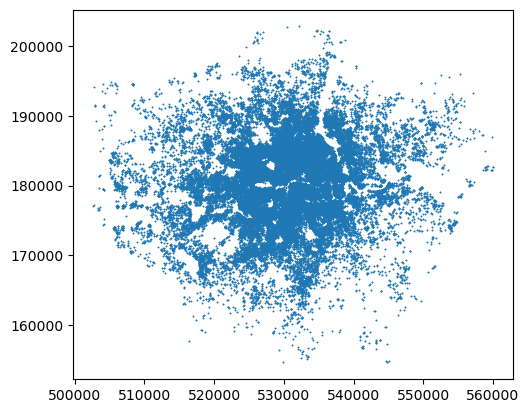

In [61]:
geo_air_2022.plot(marker='*',markersize=0.1)

##### Kernel

/opt/conda/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

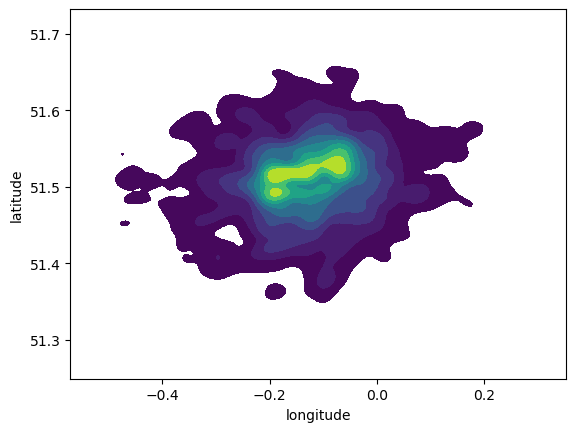

In [62]:
sns.kdeplot(geo_air_2022['longitude'], geo_air_2022['latitude'], shade=True, cmap='viridis',common_grid=True)

### Reading the TFL data

#### Reading TFL shapes (points and tracks)

In [63]:
stations = gpd.read_file("data/TFL/Landmark_Data/CRL_Stations.shp")
tracks = gpd.read_file("data/TFL/Landmark_Data/CRL_Track.shp")

In [64]:
#Inspecting stations shape
stations

,OBJECTID,STATION_NA,SIZE_,SE_ANNO_CA,geometry
0,1,Forest Gate,Small,None,POINT (540409.113 185311.628)
1,2,Manor Park,Small,None,POINT (541906.079 185683.241)
2,3,Ilford,Small,None,POINT (543515.859 186487.354)
3,4,Seven Kings,Small,None,POINT (545384.047 187089.399)
4,5,Goodmayes,Small,None,POINT (546470.589 187325.404)
5,6,Chadwell Heath,Small,None,POINT (547602.706 187606.678)
6,7,Romford,Large,None,POINT (551323.362 188458.678)
7,8,Gidea Park,Small,None,POINT (552957.607 189327.989)
8,9,Custom House,Large,None,POINT (540872.750 180939.059)
9,10,Maryland,Small,None,POINT (539193.946 184915.750)


##### Adjusting the CRS

In [65]:
print(stations.crs)
print(tracks.crs)

epsg:27700
epsg:27700


##### Assigning multi or mono station connections

In [66]:
stations['çon'] = np.nan

In [67]:
stations.columns

Index(['OBJECTID', 'STATION_NA', 'SIZE_', 'SE_ANNO_CA', 'geometry', 'çon'], dtype='object')

In [68]:
stations['çon'].iloc[0,] = "Multi"
stations['çon'].iloc[1,] = "Mono"
stations['çon'].iloc[2,] = "Mono"
stations['çon'].iloc[3,] = "Mono"
stations['çon'].iloc[4,] = "Mono"
stations['çon'].iloc[5,] = "Mono"
stations['çon'].iloc[6,] = "Multi"
stations['çon'].iloc[7,] = "Mono"
stations['çon'].iloc[8,] = "Multi"
stations['çon'].iloc[9,] = "Mono"
stations['çon'].iloc[10,] = "Multi"
stations['çon'].iloc[11,] = "Multi"
stations['çon'].iloc[12,] = "Multi"
stations['çon'].iloc[13,] = "Multi"
stations['çon'].iloc[14,] = "Multi"
stations['çon'].iloc[15,] = "Multi"
stations['çon'].iloc[16,] = "Multi"
stations['çon'].iloc[17,] = "Multi"
stations['çon'].iloc[18,] = "Multi"
stations['çon'].iloc[19,] = "Multi"
stations['çon'].iloc[20,] = "Mono"
stations['çon'].iloc[21,] = "Mono"
stations['çon'].iloc[22,] = "Multi"
stations['çon'].iloc[23,] = "Mono"
stations['çon'].iloc[24,] = "Multi"
stations['çon'].iloc[25,] = "Mono"
stations['çon'].iloc[26,] = "Mono"
stations['çon'].iloc[27,] = "Mono"
stations['çon'].iloc[28,] = "Multi"
stations['çon'].iloc[29,] = "Multi"
stations['çon'].iloc[30,] = "Multi"
stations['çon'].iloc[31,] = "Mono"
stations['çon'].iloc[32,] = "Mono"
stations['çon'].iloc[33,] = "Mono"
stations['çon'].iloc[34,] = "Multi"
stations['çon'].iloc[35,] = "Mono"
stations['çon'].iloc[36,] = "Multi"
stations['çon'].iloc[37,] = "Multi"
stations['çon'].iloc[38,] = "Multi"
stations['çon'].iloc[39,] = "Multi"
stations['çon'].iloc[40,] = "Multi"

/tmp/ipykernel_1223/682738460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['çon'].iloc[0,] = "Multi"


In [69]:
stations

,OBJECTID,STATION_NA,SIZE_,SE_ANNO_CA,geometry,çon
0,1,Forest Gate,Small,None,POINT (540409.113 185311.628),Multi
1,2,Manor Park,Small,None,POINT (541906.079 185683.241),Mono
2,3,Ilford,Small,None,POINT (543515.859 186487.354),Mono
3,4,Seven Kings,Small,None,POINT (545384.047 187089.399),Mono
4,5,Goodmayes,Small,None,POINT (546470.589 187325.404),Mono
5,6,Chadwell Heath,Small,None,POINT (547602.706 187606.678),Mono
6,7,Romford,Large,None,POINT (551323.362 188458.678),Multi
7,8,Gidea Park,Small,None,POINT (552957.607 189327.989),Mono
8,9,Custom House,Large,None,POINT (540872.750 180939.059),Multi
9,10,Maryland,Small,None,POINT (539193.946 184915.750),Mono


## Subsetting the listings data

### Distance to station method

In [70]:
#Creating a distance to station column in each dataset
geo_air_2020['dist_to_s'] = geo_air_2020.geometry.apply(lambda x: stations.distance(x).min())
geo_air_2022['dist_to_s'] = geo_air_2022.geometry.apply(lambda x: stations.distance(x).min())

#### 2020

In [71]:
#Inspecting
geo_air_2020['dist_to_s'].head()

0    6001.639654
1    5387.019564
2    3198.559619
3     927.498223
4    4319.582856
Name: dist_to_s, dtype: float64

In [72]:
#Descriptive statistics
geo_air_2020['dist_to_s'].describe()

count    74178.000000
mean      3839.835865
std       3257.262416
min          5.757387
25%       1467.737569
50%       2899.250990
75%       5077.897612
max      24049.824765
Name: dist_to_s, dtype: float64

In [73]:
#Number of listing in the radius
geo_air_2020[geo_air_2020.dist_to_s<1000].shape

(11783, 76)

In [74]:
#Median price
geo_air_2020[geo_air_2020.dist_to_s<1000].price.median()

99.0

<AxesSubplot:>

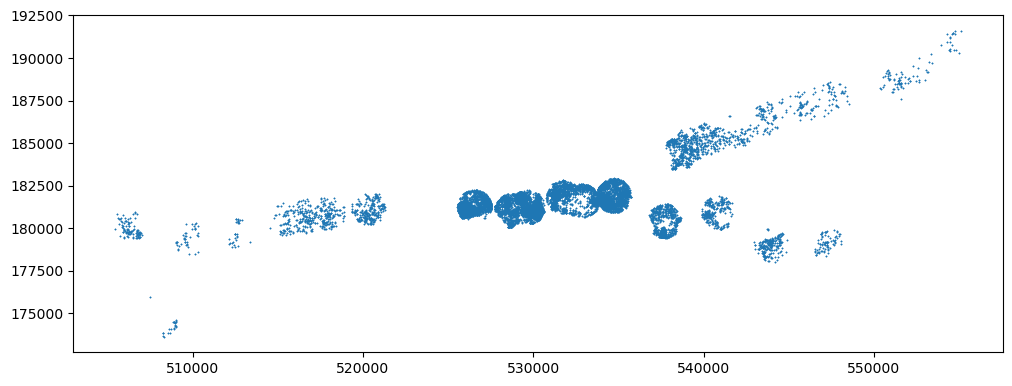

In [75]:
#Ploting geometry
fig, ax = plt.subplots(1,1, figsize=(12,9))
geo_air_2020[geo_air_2020.dist_to_s<1000].plot(ax=ax,marker='*',markersize=0.1)

In [76]:
#Number of listing in the radius
geo_air_2020[geo_air_2020.dist_to_s<2000].shape

(25346, 76)

In [77]:
#Median price
geo_air_2020[geo_air_2020.dist_to_s<2000].price.describe()

count    25346.000000
mean       135.765611
std        339.319875
min          8.000000
25%         50.000000
50%         90.000000
75%        149.000000
max      18638.000000
Name: price, dtype: float64

<AxesSubplot:>

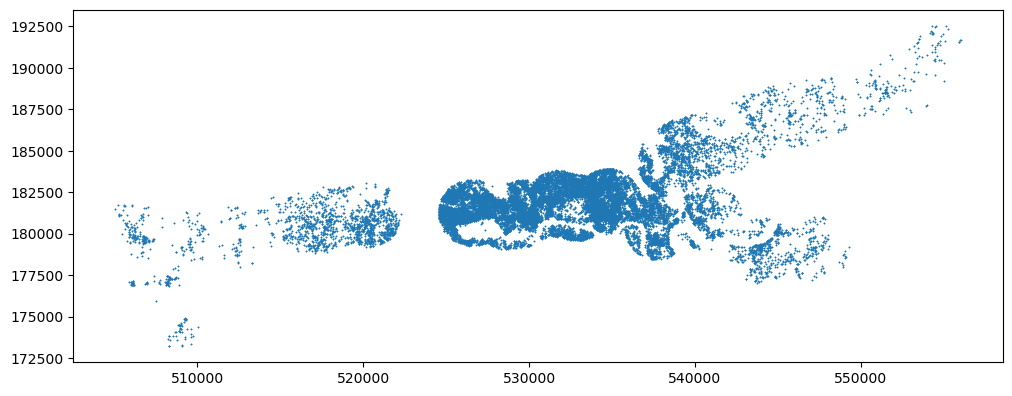

In [78]:
# Ploting geometry
fig, ax = plt.subplots(1,1, figsize=(12,9))
geo_air_2020[geo_air_2020.dist_to_s<2000].plot(ax=ax,marker='*',markersize=0.1)

In [79]:
#Number of listings
geo_air_2020[(geo_air_2020.dist_to_s<2000) & (geo_air_2020.dist_to_s>1000)].shape

(13563, 76)

In [80]:
#Descriptive statistics
geo_air_2020[(geo_air_2020.dist_to_s<2000) & (geo_air_2020.dist_to_s>1000)].price.describe()

count    13563.000000
mean       118.692917
std        243.027080
min          8.000000
25%         46.000000
50%         82.000000
75%        130.000000
max      18638.000000
Name: price, dtype: float64

<AxesSubplot:>

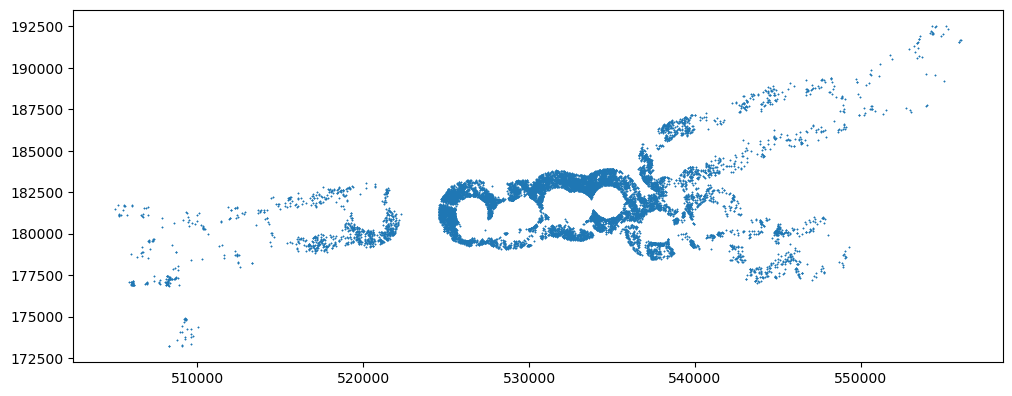

In [81]:
#Ploting geometry
fig, ax = plt.subplots(1,1, figsize=(12,9))
geo_air_2020[(geo_air_2020.dist_to_s<2000) & (geo_air_2020.dist_to_s>1000)].plot(ax=ax,marker='*',markersize=0.1)

#### 2022

In [82]:
geo_air_2022['dist_to_s'].head()

0    5464.913940
1    3227.728687
2    1380.203430
3    1019.550642
4     927.498223
Name: dist_to_s, dtype: float64

In [83]:
geo_air_2022['dist_to_s'].describe()

count    69332.000000
mean      3966.977432
std       3412.311928
min          3.190962
25%       1501.953497
50%       2963.179111
75%       5282.402190
max      26310.008788
Name: dist_to_s, dtype: float64

In [84]:
geo_air_2022[geo_air_2022.dist_to_s<1000].shape

(10820, 77)

In [85]:
geo_air_2022[geo_air_2022.dist_to_s<1000].price.median()

140.0

<AxesSubplot:>

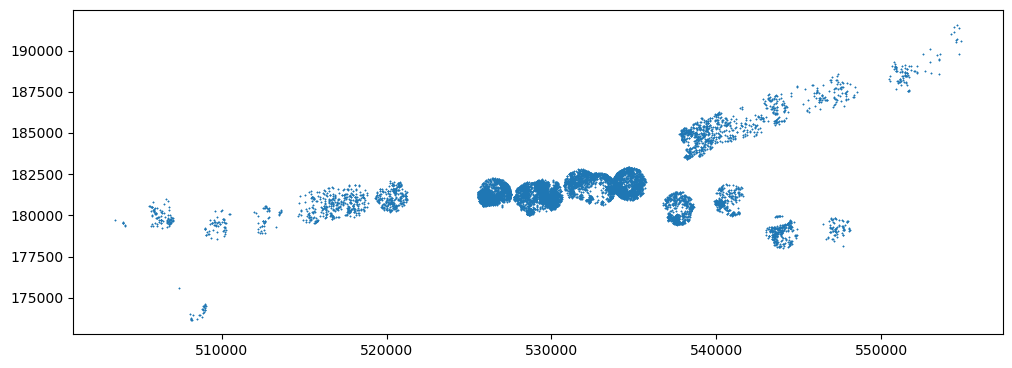

In [86]:
fig, ax = plt.subplots(1,1, figsize=(12,9))
geo_air_2022[geo_air_2022.dist_to_s<1000].plot(ax=ax,marker='*',markersize=0.1)

In [87]:
geo_air_2022[geo_air_2022.dist_to_s<2000].shape

(23211, 77)

In [88]:
geo_air_2022[geo_air_2022.dist_to_s<2000].price.describe()

count    23211.000000
mean       203.857697
std        434.061853
min          1.000000
25%         65.000000
50%        120.000000
75%        215.000000
max      25000.000000
Name: price, dtype: float64

<AxesSubplot:>

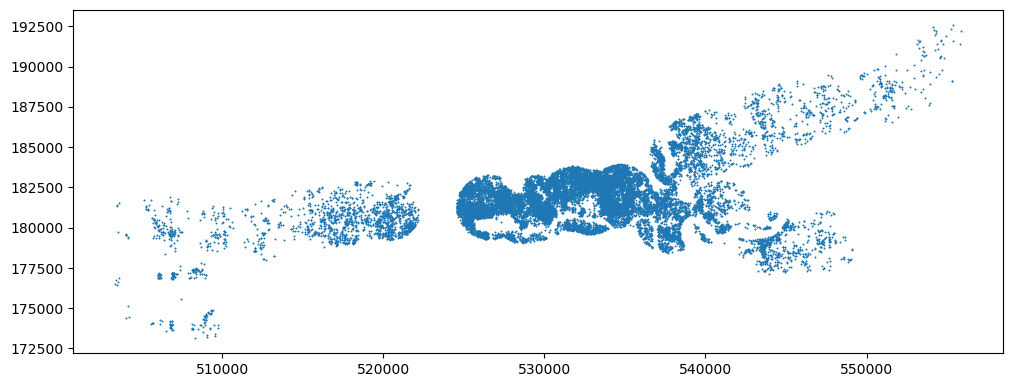

In [89]:
fig, ax = plt.subplots(1,1, figsize=(12,9))
geo_air_2022[geo_air_2022.dist_to_s<2000].plot(ax=ax,marker='*',markersize=0.1)

In [90]:
geo_air_2022[(geo_air_2022.dist_to_s<2000) & (geo_air_2022.dist_to_s>1000)].shape

(12391, 77)

In [91]:
geo_air_2022[(geo_air_2022.dist_to_s<2000) & (geo_air_2022.dist_to_s>1000)].price.describe()

count    12391.000000
mean       184.258252
std        343.019306
min          1.000000
25%         60.000000
50%        103.000000
75%        189.000000
max       9999.000000
Name: price, dtype: float64

<AxesSubplot:>

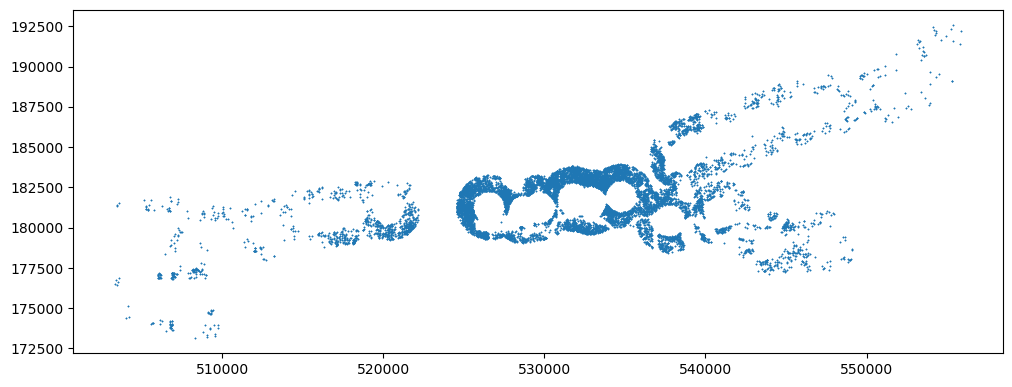

In [92]:
fig, ax = plt.subplots(1,1, figsize=(12,9))
geo_air_2022[(geo_air_2022.dist_to_s<2000) & (geo_air_2022.dist_to_s>1000)].plot(ax=ax,marker='*',markersize=0.1)

### Overall results

In [93]:
print(f"2020 Airbnb listings \n1 km radious\nNumber of listings: {geo_air_2020[geo_air_2020.dist_to_s<1000].shape[0]:,}\nMedian price: {geo_air_2020[geo_air_2020.dist_to_s<1000]['price'].median()}.")

2020 Airbnb listings 
1 km radious
Number of listings: 11,783
Median price: 99.0.


In [94]:
print(f"2020 Airbnb listings \n1-2 km radious\nNumber of listings: {geo_air_2020[(geo_air_2020.dist_to_s<2000) & (geo_air_2020.dist_to_s>1000)].shape[0]:,}\nMedian price: {geo_air_2020[(geo_air_2020.dist_to_s<2000) & (geo_air_2020.dist_to_s>1000)]['price'].median()}.")

2020 Airbnb listings 
1-2 km radious
Number of listings: 13,563
Median price: 82.0.


In [95]:
print(f"2020 Airbnb listings \n2 km radious\nNumber of listings: {geo_air_2020[geo_air_2020.dist_to_s<2000].shape[0]:,}\nMedian price: {geo_air_2020[geo_air_2020.dist_to_s<2000]['price'].median()}.")

2020 Airbnb listings 
2 km radious
Number of listings: 25,346
Median price: 90.0.


In [96]:
print(f"2022 Airbnb listings \n1 km radious\nNumber of listings: {geo_air_2022[geo_air_2022.dist_to_s<1000].shape[0]:,}\nMedian price: {geo_air_2022[geo_air_2022.dist_to_s<1000]['price'].median()}.\nMedian price variation: {(geo_air_2022[geo_air_2022.dist_to_s<1000]['price'].median()-geo_air_2020[geo_air_2020.dist_to_s<1000]['price'].median())/geo_air_2020[geo_air_2020.dist_to_s<1000]['price'].median():,.2%}.")

2022 Airbnb listings 
1 km radious
Number of listings: 10,820
Median price: 140.0.
Median price variation: 41.41%.


In [97]:
print(f"2022 Airbnb listings \n1-2 km radious\nNumber of listings: {geo_air_2022[(geo_air_2022.dist_to_s<2000) & (geo_air_2022.dist_to_s>1000)].shape[0]:,}\nMedian price: {geo_air_2022[(geo_air_2022.dist_to_s<2000) & (geo_air_2022.dist_to_s>1000)]['price'].median()}\nMedian price variation: {(geo_air_2022[(geo_air_2022.dist_to_s<2000) & (geo_air_2022.dist_to_s>1000)]['price'].median()-geo_air_2020[(geo_air_2020.dist_to_s<2000) & (geo_air_2020.dist_to_s>1000)]['price'].median())/geo_air_2020[(geo_air_2020.dist_to_s<2000) & (geo_air_2020.dist_to_s>1000)]['price'].median():,.2%}.")

2022 Airbnb listings 
1-2 km radious
Number of listings: 12,391
Median price: 103.0
Median price variation: 25.61%.


In [98]:
print(f"2022 Airbnb listings \n2 km radious\nNumber of listings: {geo_air_2022[geo_air_2022.dist_to_s<2000].shape[0]:,}\nMedian price: {geo_air_2022[geo_air_2022.dist_to_s<2000]['price'].median()}\nMedian price variation: {(geo_air_2022[geo_air_2022.dist_to_s<2000]['price'].median()-geo_air_2020[geo_air_2020.dist_to_s<2000]['price'].median())/geo_air_2020[geo_air_2020.dist_to_s<2000]['price'].median():,.2%} .")

2022 Airbnb listings 
2 km radious
Number of listings: 23,211
Median price: 120.0
Median price variation: 33.33% .


### Spatial joining (Stations name)

In [99]:
geo_air_2020_js = geo_air_2020.sjoin_nearest(stations,how='inner',distance_col='dist_join')
geo_air_2022_js = geo_air_2022.sjoin_nearest(stations,how='inner',distance_col='dist_join')

#### 2020

In [100]:
geo_air_2020_js.shape

(74178, 83)

In [101]:
geo_air_2020_js[geo_air_2020_js.dist_to_s<2000].shape

(25346, 83)

In [102]:
geo_air_2020_js.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,reviews_per_month,geometry,dist_to_s,index_right,OBJECTID,STATION_NA,SIZE_,SE_ANNO_CA,çon,dist_join
0,11551.0,https://www.airbnb.com/rooms/11551,20200824024753,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039.0,https://www.airbnb.com/users/show/43039,...,1.51,POINT (530885.122 175377.940),6001.639654,17,18,Tottenham Court Road,Large,None,Multi,6001.639654
3,17402.0,https://www.airbnb.com/rooms/17402,20200824024753,2020-08-27,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564.0,https://www.airbnb.com/users/show/67564,...,0.37,POINT (529075.790 181974.865),927.498223,17,18,Tottenham Court Road,Large,None,Multi,927.498223
35,47192.0,https://www.airbnb.com/rooms/47192,20200824024753,2020-08-26,Single Room in zone 1,"Hi everyone, welcome to my little haven. My fl...",The nearest tube station to my flat is Great P...,https://a0.muscache.com/pictures/54290798/f46d...,212734.0,https://www.airbnb.com/users/show/212734,...,3.09,POINT (528852.745 182831.588),1772.264940,17,18,Tottenham Court Road,Large,None,Multi,1772.264940
51,65908.0,https://www.airbnb.com/rooms/65908,20200824024753,2020-08-26,Lovely room in cool Brixton,<b>The space</b><br />Available for you to ren...,NaN,https://a0.muscache.com/pictures/4350503/e0262...,322341.0,https://www.airbnb.com/users/show/322341,...,NaN,POINT (530700.653 175090.560),6249.809664,17,18,Tottenham Court Road,Large,None,Multi,6249.809664
58,71875.0,https://www.airbnb.com/rooms/71875,20200824024753,2020-08-26,"Bright Very Central 1-Bed in W1. King Bed, Wifi",Clean modern well-equipped apt in very central...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/26416186/d382...,67564.0,https://www.airbnb.com/users/show/67564,...,0.70,POINT (529238.223 182002.362),859.072886,17,18,Tottenham Court Road,Large,None,Multi,859.072886


In [103]:
geo_air_2020_js.STATION_NA.unique()

array(['Tottenham Court Road', 'Farringdon', 'Paddington', 'Hanwell',
       'Ealing Broadway', 'Whitechapel', 'Canary Wharf',
       'Acton Main Line', 'Liverpool Street', 'Maryland', 'Bond Street',
       'Ilford', 'Forest Gate', 'Heathrow T4', 'Romford', 'Woolwich',
       'Stratford', 'Southall', 'Manor Park', 'Custom House',
       'West Ealing', 'Hayes & Harlington', 'Chadwell Heath',
       'West Drayton', 'Abbey Wood', 'Seven Kings', 'Harold Wood',
       'Goodmayes', 'Gidea Park', 'Heathrow Central', 'Heathrow T5'],
      dtype=object)

#### 2022

In [104]:
geo_air_2022_js.shape

(69332, 84)

In [105]:
geo_air_2022_js[geo_air_2022_js.dist_to_s<2000].shape

(23211, 84)

In [106]:
geo_air_2022_js.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,reviews_per_month,geometry,dist_to_s,index_right,OBJECTID,STATION_NA,SIZE_,SE_ANNO_CA,çon,dist_join
0,13913,https://www.airbnb.com/rooms/13913,20220910194334,2022-09-11,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,0.20,POINT (530901.013 187213.787),5464.913940,19,20,Farringdon,Large,None,Multi,5464.913940
5,107048,https://www.airbnb.com/rooms/107048,20220910194334,2022-09-11,city scrape,A Luxury Studio Suite in Clerkenwell,"Situated in the heart of vibrant Clerkenwell, ...",Clerkenwell & Vicinity Recommendations<br /><b...,https://a0.muscache.com/pictures/ff065257-7660...,259088,...,3.59,POINT (531572.006 182353.814),569.496622,19,20,Farringdon,Large,None,Multi,569.496622
10,116268,https://www.airbnb.com/rooms/116268,20220910194334,2022-09-11,city scrape,DOUBLE ROOM NEAR CENTRAL LONDON,<b>The space</b><br />One lovely double bedroo...,NaN,https://a0.muscache.com/pictures/855414/0f978d...,586671,...,0.29,POINT (530350.368 191957.865),10238.504293,19,20,Farringdon,Large,None,Multi,10238.504293
32,38950,https://www.airbnb.com/rooms/38950,20220910194334,2022-09-11,previous scrape,Room 1 Large Double Bedroom - front ground floor,Room 1 <br />Bright and Spacious Double Bedro...,"North London, West Green, Tottenham",https://a0.muscache.com/pictures/ab0c51a0-adc9...,167107,...,0.11,POINT (532676.137 189288.550),7526.886587,19,20,Farringdon,Large,None,Multi,7526.886587
37,40228,https://www.airbnb.com/rooms/40228,20220910194334,2022-09-11,previous scrape,Room 4 Cosy Double Bedroom on First Floor,Double Bedroom First Floor with double bed<br...,"West Green is an area of North London, England...",https://a0.muscache.com/pictures/82ed75e5-cfb1...,167107,...,NaN,POINT (532563.728 189345.700),7570.903745,19,20,Farringdon,Large,None,Multi,7570.903745


In [107]:
geo_air_2022_js.STATION_NA.unique()

array(['Farringdon', 'Paddington', 'Whitechapel', 'Tottenham Court Road',
       'Bond Street', 'Hanwell', 'Acton Main Line', 'Southall',
       'Custom House', 'Forest Gate', 'Stratford', 'Ealing Broadway',
       'Liverpool Street', 'Canary Wharf', 'Maryland', 'Chadwell Heath',
       'West Drayton', 'Abbey Wood', 'Ilford', 'Heathrow T4', 'Romford',
       'Woolwich', 'Manor Park', 'West Ealing', 'Seven Kings',
       'Hayes & Harlington', 'Harold Wood', 'Goodmayes', 'Gidea Park',
       'Heathrow Central', 'Heathrow T5', 'Brentwood', 'Iver'],
      dtype=object)

Add the point of the station

### Median price results by stations

#### 2020

In [108]:
# Median price grouping by stations in 1 km radius
result_2020_r_1k = geo_air_2020_js[geo_air_2020_js.dist_to_s<1000].groupby('STATION_NA')['price'].agg('median').sort_values(ascending = False)
result_2020_r_1k.head()

STATION_NA
Bond Street             206.0
Tottenham Court Road    146.0
Harold Wood             117.0
Farringdon              115.0
Paddington              114.0
Name: price, dtype: float64

In [109]:
# Median price grouping by stations in 2 km radius
result_2020_r_2k = geo_air_2020_js[geo_air_2020_js.dist_to_s<2000].groupby('STATION_NA')['price'].agg('median').sort_values(ascending = False)
result_2020_r_2k.head()

STATION_NA
Bond Street             186.0
Tottenham Court Road    125.0
Paddington              110.0
Farringdon              100.0
Liverpool Street        100.0
Name: price, dtype: float64

In [110]:
# Median price grouping by stations in 1-2 km radius
result_2020_r_1k_2k = geo_air_2020_js[(geo_air_2020.dist_to_s<2000) & (geo_air_2020.dist_to_s>1000)].groupby('STATION_NA')['price'].agg('median').sort_values(ascending = False)
result_2020_r_1k_2k.head()

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


STATION_NA
Bond Street             145.0
Paddington              109.0
Liverpool Street         98.0
Farringdon               92.0
Tottenham Court Road     90.0
Name: price, dtype: float64

In [111]:
type(result_2020_r_1k_2k)

pandas.core.series.Series

#### 2022

In [112]:
# Median price grouping by stations in 1 km radius
result_2022_r_1k = geo_air_2022_js[geo_air_2022_js.dist_to_s<1000].groupby('STATION_NA')['price'].agg('median').sort_values(ascending = False)
result_2022_r_1k.head()

STATION_NA
Bond Street             320.0
Tottenham Court Road    240.0
Harold Wood             172.5
Iver                    171.0
Liverpool Street        164.0
Name: price, dtype: float64

In [113]:
# Median price grouping by stations in 2 km radius
result_2022_r_2k = geo_air_2022_js[geo_air_2022_js.dist_to_s<2000].groupby('STATION_NA')['price'].agg('median').sort_values(ascending = False)
result_2022_r_2k.head()

STATION_NA
Bond Street             288.0
Tottenham Court Road    192.0
Iver                    154.5
Paddington              150.0
Harold Wood             145.0
Name: price, dtype: float64

In [114]:
# Median price grouping by stations in 1-2 km radius
result_2022_r_1k_2k = geo_air_2022_js[(geo_air_2022.dist_to_s<2000) & (geo_air_2022.dist_to_s>1000)].groupby('STATION_NA')['price'].agg('median').sort_values(ascending = False)
result_2022_r_1k_2k.head()

/opt/conda/lib/python3.10/site-packages/geopandas/geodataframe.py:1428: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


STATION_NA
Bond Street         242.0
Paddington          150.0
Liverpool Street    134.0
Heathrow T4         125.0
Farringdon          125.0
Name: price, dtype: float64

#### Merging 2020 results

In [115]:
#Mergins 1km with 1-2km radius by station
results_2020 = pd.merge(result_2020_r_1k, result_2020_r_1k_2k, right_index = True, left_index = True)

In [116]:
results_2020

,price_x,price_y
STATION_NA,,
Bond Street,206.0,145.0
Tottenham Court Road,146.0,90.0
Harold Wood,117.0,40.0
Farringdon,115.0,92.0
Paddington,114.0,109.0
Liverpool Street,104.5,98.0
Canary Wharf,80.0,60.0
Custom House,80.0,75.0
Stratford,75.0,55.0


In [117]:
#Renaming merged columns
results_2020.rename(columns={'price_x': 'R_1K_2020', 'price_y': 'R_1K_2K_2020'}, inplace=True)

In [118]:
results_2020

,R_1K_2020,R_1K_2K_2020
STATION_NA,,
Bond Street,206.0,145.0
Tottenham Court Road,146.0,90.0
Harold Wood,117.0,40.0
Farringdon,115.0,92.0
Paddington,114.0,109.0
Liverpool Street,104.5,98.0
Canary Wharf,80.0,60.0
Custom House,80.0,75.0
Stratford,75.0,55.0


In [119]:
#Mergins previous results with 2 km radius by station
results_2020_total = pd.merge(results_2020, result_2020_r_2k, right_index = True, left_index = True)

In [120]:
results_2020_total

,R_1K_2020,R_1K_2K_2020,price
STATION_NA,,,
Bond Street,206.0,145.0,186.0
Tottenham Court Road,146.0,90.0,125.0
Harold Wood,117.0,40.0,49.5
Farringdon,115.0,92.0,100.0
Paddington,114.0,109.0,110.0
Liverpool Street,104.5,98.0,100.0
Canary Wharf,80.0,60.0,68.0
Custom House,80.0,75.0,75.0
Stratford,75.0,55.0,60.0


In [121]:
#Renaming 2km radius column
results_2020_total.rename(columns={'price': 'R_2K_2020'}, inplace=True)

In [122]:
results_2020_total

,R_1K_2020,R_1K_2K_2020,R_2K_2020
STATION_NA,,,
Bond Street,206.0,145.0,186.0
Tottenham Court Road,146.0,90.0,125.0
Harold Wood,117.0,40.0,49.5
Farringdon,115.0,92.0,100.0
Paddington,114.0,109.0,110.0
Liverpool Street,104.5,98.0,100.0
Canary Wharf,80.0,60.0,68.0
Custom House,80.0,75.0,75.0
Stratford,75.0,55.0,60.0


#### Merging 2022 results

In [123]:
#Mergins 1km with 1-2km radius by station
results_2022 = pd.merge(result_2022_r_1k, result_2022_r_1k_2k, right_index = True, left_index = True)

In [124]:
results_2022

,price_x,price_y
STATION_NA,,
Bond Street,320.0,242.0
Tottenham Court Road,240.0,125.0
Harold Wood,172.5,80.0
Iver,171.0,46.0
Liverpool Street,164.0,134.0
Paddington,154.0,150.0
Farringdon,147.0,125.0
Canary Wharf,120.0,75.0
Custom House,120.0,99.5


In [125]:
#Renaming merged columns
results_2022.rename(columns={'price_x': 'R_1K_2022', 'price_y': 'R_1K_2K_2022'}, inplace=True)

In [126]:
results_2022

,R_1K_2022,R_1K_2K_2022
STATION_NA,,
Bond Street,320.0,242.0
Tottenham Court Road,240.0,125.0
Harold Wood,172.5,80.0
Iver,171.0,46.0
Liverpool Street,164.0,134.0
Paddington,154.0,150.0
Farringdon,147.0,125.0
Canary Wharf,120.0,75.0
Custom House,120.0,99.5


In [127]:
#Mergins previous results with 2 km radius by station
results_2022_total = pd.merge(results_2022, result_2022_r_2k, right_index = True, left_index = True)

In [128]:
results_2022_total

,R_1K_2022,R_1K_2K_2022,price
STATION_NA,,,
Bond Street,320.0,242.0,288.0
Tottenham Court Road,240.0,125.0,192.0
Harold Wood,172.5,80.0,145.0
Iver,171.0,46.0,154.5
Liverpool Street,164.0,134.0,140.0
Paddington,154.0,150.0,150.0
Farringdon,147.0,125.0,134.0
Canary Wharf,120.0,75.0,85.0
Custom House,120.0,99.5,105.0


In [129]:
#Renaming 2km column
results_2022_total.rename(columns={'price': 'R_2K_2022'}, inplace=True)

In [130]:
results_2022_total

,R_1K_2022,R_1K_2K_2022,R_2K_2022
STATION_NA,,,
Bond Street,320.0,242.0,288.0
Tottenham Court Road,240.0,125.0,192.0
Harold Wood,172.5,80.0,145.0
Iver,171.0,46.0,154.5
Liverpool Street,164.0,134.0,140.0
Paddington,154.0,150.0,150.0
Farringdon,147.0,125.0,134.0
Canary Wharf,120.0,75.0,85.0
Custom House,120.0,99.5,105.0


#### Merging 2020 and 2022 results

In [131]:
#Merging the 2020 and 2022 results by station
results_2020_2022_total = pd.merge(results_2020_total, results_2022_total, right_index = True, left_index = True)

In [132]:
results_2020_2022_total

,R_1K_2020,R_1K_2K_2020,R_2K_2020,R_1K_2022,R_1K_2K_2022,R_2K_2022
STATION_NA,,,,,,
Bond Street,206.0,145.0,186.0,320.0,242.0,288.0
Tottenham Court Road,146.0,90.0,125.0,240.0,125.0,192.0
Harold Wood,117.0,40.0,49.5,172.5,80.0,145.0
Farringdon,115.0,92.0,100.0,147.0,125.0,134.0
Paddington,114.0,109.0,110.0,154.0,150.0,150.0
Liverpool Street,104.5,98.0,100.0,164.0,134.0,140.0
Canary Wharf,80.0,60.0,68.0,120.0,75.0,85.0
Custom House,80.0,75.0,75.0,120.0,99.5,105.0
Stratford,75.0,55.0,60.0,97.0,80.0,85.0


In [133]:
#Calculating the percentage variations at each radius between 2020 and 2022
results_2020_2022_total['diff_1K'] = round((results_2020_2022_total['R_1K_2022']-results_2020_2022_total['R_1K_2020'])/results_2020_2022_total['R_1K_2020'],3)
results_2020_2022_total['diff_1K_2K'] = round((results_2020_2022_total['R_1K_2K_2022']-results_2020_2022_total['R_1K_2K_2020'])/results_2020_2022_total['R_1K_2K_2020'],3)
results_2020_2022_total['diff_2K'] = round((results_2020_2022_total['R_2K_2022']-results_2020_2022_total['R_2K_2020'])/results_2020_2022_total['R_2K_2020'],3)

#Assigning percentage format
results_2020_2022_total.style.format({
    'diff_1K': '{:,.2%}'.format,
    'diff_1K_2K': '{:,.2%}'.format,
    'diff_2K': '{:,.2%}'.format,
})

#Sorting by 1k radius difference
results_2020_2022_total.sort_values('diff_1K',ascending=False)

,R_1K_2020,R_1K_2K_2020,R_2K_2020,R_1K_2022,R_1K_2K_2022,R_2K_2022,diff_1K,diff_1K_2K,diff_2K
STATION_NA,,,,,,,,,
Hanwell,42.0,45.0,45.0,85.0,72.5,80.0,1.024,0.611,0.778
Goodmayes,35.0,50.0,45.5,67.0,48.0,60.0,0.914,-0.040,0.319
Southall,42.0,33.0,35.0,80.0,65.0,72.0,0.905,0.970,1.057
Hayes & Harlington,45.0,40.0,40.0,78.0,57.0,70.0,0.733,0.425,0.750
Heathrow Central,52.0,60.0,59.5,89.0,111.0,105.5,0.712,0.850,0.773
Tottenham Court Road,146.0,90.0,125.0,240.0,125.0,192.0,0.644,0.389,0.536
Ealing Broadway,57.0,46.0,50.0,90.0,78.0,86.0,0.579,0.696,0.720
Liverpool Street,104.5,98.0,100.0,164.0,134.0,140.0,0.569,0.367,0.400
Bond Street,206.0,145.0,186.0,320.0,242.0,288.0,0.553,0.669,0.548


#### Ploting results

##### Color according to connections to other stations

In [135]:
station_color = results_2020_2022_total['diff_1K'].sort_values(ascending=False)

station_color.to_frame('station_color_df')

,station_color_df
STATION_NA,
Hanwell,1.024
Goodmayes,0.914
Southall,0.905
Hayes & Harlington,0.733
Heathrow Central,0.712
Tottenham Court Road,0.644
Ealing Broadway,0.579
Liverpool Street,0.569
Bond Street,0.553


In [136]:
type(station_color_df)

NameError: name 'station_color_df' is not defined

In [ ]:
#Ploting with pandas
results_2020_2022_total['diff_1K'].sort_values(ascending=True).plot(kind='barh',sort_columns=True,figsize=(5,8),in_layout=True, color='xkcd:purple')
plt.xlabel('Variation percentage')
plt.ylabel('Station',rotation = 0)
plt.savefig("Price_median_var_1k.jpg",bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
len(results_2020_2022_total['diff_1K'].sort_values(ascending=True))

In [ ]:
results_2020_2022_total_r = results_2020_2022_total.reset_index()

In [ ]:
#Ploting with seaborn
sns.set_palette('colorblind')

sns.barplot(x='diff_1K', y='STATION_NA', data=results_2020_2022_total_r,
            label="Total", color="xkcd:purple",order=results_2020_2022_total_r.sort_values('diff_1K',ascending=False).STATION_NA,dodge=True,in_layout=True)

plt.xlabel('Variation percentage')
plt.ylabel('Station',rotation = 0)
plt.savefig("Price_median_var_1k_purple.jpg",bbox_inches='tight',dpi=300)

In [ ]:
results_2020_2022_total

In [ ]:
results_2020_2022_total['diff_1K_2K'].sort_values(ascending=True).plot(kind='barh',sort_columns=True, title='Percentage 2022-2020 variation in median price for 1-2 km radius by station',figsize=(5,8),in_layout=True)
plt.savefig("Price_median_var_1k_2k.jpg",bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
results_2020_2022_total['diff_2K'].sort_values(ascending=True).plot(kind='barh',sort_columns=True, title='Percentage 2022-2020 variation in median price for 2km radius by station',figsize=(5,8),in_layout=True)
plt.savefig("Price_median_var_2k.jpg",bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
fig, ax = plt.subplots()
results_2020_2022_total[['diff_1K','diff_1K_2K','diff_2K']].sort_values('diff_1K',ascending=True).plot(kind='barh',sort_columns=True, title='Percentage 2022-2020 variation in median price by radius by station',figsize=(5,8),in_layout=True,ax=ax)
ax.legend(["1km radius", "1-2km radius","2km radius"])

### Number of listings results by stations

#### 2020

In [ ]:
#Grouping count of listings in 1 km radius by stations
count_2020_r_1k = geo_air_2020_js[geo_air_2020_js.dist_to_s<1000].groupby('STATION_NA')['id'].agg('count').sort_values(ascending = False)
count_2020_r_1k.head()

In [ ]:
#Grouping count of listings in 2 km radius by stations
count_2020_r_2k = geo_air_2020_js[geo_air_2020_js.dist_to_s<2000].groupby('STATION_NA')['id'].agg('count').sort_values(ascending = False)
count_2020_r_2k.head()

In [ ]:
#Grouping count of listings in 1-2 km radius by stations
count_2020_r_1k_2k = geo_air_2020_js[(geo_air_2020.dist_to_s<2000) & (geo_air_2020.dist_to_s>1000)].groupby('STATION_NA')['id'].agg('count').sort_values(ascending = False)
count_2020_r_1k_2k.head()

#### 2022

In [ ]:
#Grouping count of listings in 1 km radius by stations
count_2022_r_1k = geo_air_2022_js[geo_air_2022_js.dist_to_s<1000].groupby('STATION_NA')['id'].agg('count').sort_values(ascending = False)
count_2022_r_1k.head()

In [ ]:
#Grouping count of listings in 2 km radius by stations
count_2022_r_2k = geo_air_2022_js[geo_air_2022_js.dist_to_s<2000].groupby('STATION_NA')['id'].agg('count').sort_values(ascending = False)
count_2022_r_2k.head()

In [ ]:
#Grouping count of listings in 1-2 km radius by stations
count_2022_r_1k_2k = geo_air_2022_js[(geo_air_2022.dist_to_s<2000) & (geo_air_2022.dist_to_s>1000)].groupby('STATION_NA')['id'].agg('count').sort_values(ascending = False)
count_2022_r_1k_2k.head()

#### Merging 2020 listings results

In [ ]:
#Merging 1k with 1-2km count of listings
count_2020 = pd.merge(count_2020_r_1k, count_2020_r_1k_2k, right_index = True, left_index = True)

In [ ]:
count_2020

In [ ]:
#Renaming merged columns
count_2020.rename(columns={'id_x': 'R_1K_2020', 'id_y': 'R_1K_2K_2020'}, inplace=True)

In [ ]:
count_2020

In [ ]:
#Merging previous results with 2km listings counts
count_2020_total = pd.merge(count_2020, count_2020_r_2k, right_index = True, left_index = True)

In [ ]:
count_2020_total

In [ ]:
#Renaming 2km column
count_2020_total.rename(columns={'id': 'R_2K_2020'}, inplace=True)

In [ ]:
count_2020_total

#### Merging 2022 results

In [ ]:
#Merging 1k with 1-2km count of listings
count_2022 = pd.merge(count_2022_r_1k, count_2022_r_1k_2k, right_index = True, left_index = True)

In [ ]:
count_2022

In [ ]:
#Renaming columns
count_2022.rename(columns={'id_x': 'R_1K_2022', 'id_y': 'R_1K_2K_2022'}, inplace=True)

In [ ]:
count_2022

In [ ]:
#Merging previous results with 2km listings counts
count_2022_total = pd.merge(count_2022, count_2022_r_2k, right_index = True, left_index = True)

In [ ]:
count_2022_total

In [ ]:
#Renaming 2km column
count_2022_total.rename(columns={'id': 'R_2K_2022'}, inplace=True)

In [ ]:
count_2022_total

#### Merging 2020 and 2022 listings results

In [ ]:
#Merging 2020 and 2022 count dfs
count_2020_2022_total = pd.merge(count_2020_total, count_2022_total, right_index = True, left_index = True)

In [ ]:
count_2020_2022_total

In [ ]:
#Calculating percentage variation for each radius
count_2020_2022_total['diff_1K'] = (count_2020_2022_total['R_1K_2022']-count_2020_2022_total['R_1K_2020'])/count_2020_2022_total['R_1K_2020']
count_2020_2022_total['diff_1K_2K'] = (count_2020_2022_total['R_1K_2K_2022']-count_2020_2022_total['R_1K_2K_2020'])/count_2020_2022_total['R_1K_2K_2020']
count_2020_2022_total['diff_2K'] = (count_2020_2022_total['R_2K_2022']-count_2020_2022_total['R_2K_2020'])/count_2020_2022_total['R_2K_2020']

#Assigning percentage format
count_2020_2022_total.style.format({
    'diff_1K': '{:,.2%}'.format,
    'diff_1K_2K': '{:,.2%}'.format,
    'diff_2K': '{:,.2%}'.format,
})

count_2020_2022_total

#### Ploting listings results

In [ ]:
count_2020_2022_total['diff_1K'].sort_values(ascending=True).plot(kind='barh',sort_columns=True, title='Percentage 2022-2020 variation in number of listings for 1km radius by station',figsize=(5,8),in_layout=True)
plt.savefig("Listings_var_1k.jpg",bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
count_2020_2022_total['diff_1K_2K'].sort_values(ascending=True).plot(kind='barh',sort_columns=True, title='Percentage 2022-2020 variation in number of listings for 1-2 km radius by station',figsize=(5,8),in_layout=True)
plt.savefig("Listings_var_1k_2k.jpg",bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
count_2020_2022_total['diff_2K'].sort_values(ascending=True).plot(kind='barh',sort_columns=True, title='Percentage 2022-2020 variation in number of listings for 2km radius by station',figsize=(5,8),in_layout=True)
plt.savefig("Listings_var_2k.jpg",bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
fig, ax = plt.subplots()
count_2020_2022_total[['diff_1K','diff_1K_2K','diff_2K']].sort_values('diff_1K',ascending=True).plot(kind='barh',sort_columns=True, title='Percentage 2022-2020 variation in median price by radius by station',figsize=(5,8),in_layout=True,ax=ax)
ax.legend(["1km radius", "1-2km radius","2km radius"])

### Final merge

In [ ]:
#Meging counts and median price df
final_2020_2022 = pd.merge(results_2020_2022_total, count_2020_2022_total, right_index = True, left_index = True, suffixes= ('_m','_c'))
final_2020_2022.sort_values('diff_1K_2K_m',ascending=False)

In [ ]:
fig, ax = plt.subplots()
final_2020_2022[['diff_1K_m','diff_1K_2K_m']].sort_values('diff_1K_m',ascending=True).plot(kind='barh',sort_columns=True, title='Percentage 2022-2020 variation in median price by radius by station',figsize=(5,8),in_layout=True,ax=ax)
ax.legend(["1 km radius", "1-2 km radius"])
plt.savefig("Price_median_var_1k_1-2k.jpg",bbox_inches='tight',dpi=300)

In [ ]:
fig, ax = plt.subplots()
final_2020_2022[['diff_1K_c','diff_2K_c']].sort_values('diff_1K_c',ascending=True).plot(kind='barh',sort_columns=True, title='Percentage 2022-2020 variation in number of listings by radius by station',figsize=(5,8),in_layout=True,ax=ax)
ax.legend(["1 km radius", "2 km radius"])